In [1]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import glob
import requests
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import pandas as pd
os.chdir(r"C:\Users\kulkarnr\Desktop\215")

In [2]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "UNSW_NB15_training-set_csc215.csv", index=False, encoding='utf-8-sig')

In [5]:
data=combined_csv
data


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.321500,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.660800,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.285220,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.000000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.000000,...,2,2,0,0,0,2,2,1,Normal,0


In [6]:
data.drop(['id'], axis=1, inplace=True)

In [7]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
 

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [8]:
data11=data

In [52]:
#

In [9]:
state = encode_text_dummy(data,"state")
service = encode_text_dummy(data,"service")
proto = encode_text_dummy(data,"proto")
attack_cat = encode_text_dummy(data,"attack_cat")

In [10]:
#x,y=to_xy(data,'label')
data1=data

In [11]:
encode_numeric_zscore(data,['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'])



In [12]:
data.drop(['service--'], axis=1, inplace=True)

In [13]:
data1=data

In [14]:
#encode_numeric_zscore(data,'dur')
#x = data.drop(['label'], axis = 1)
#y = data.loc[:, ['label']]
x,y=to_xy(data,'label')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape

((257673, 205), (257673,), (193254, 205), (193254,), (64419, 205), (64419,))

In [61]:
#

In [17]:

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1)

# fit the model with data
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = logreg.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

In [19]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 1.0


In [20]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 1.0


In [21]:
score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 1.0


In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
classification = metrics.classification_report(y_test, y_pred)

[[23243     0]
 [    0 41176]]
Plotting confusion matrix


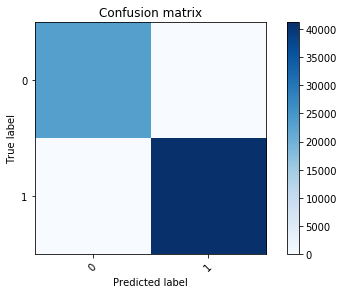

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [25]:
print(confusion_matrix)
print(classification)
print(accuracy)

<function confusion_matrix at 0x0000016DF87E68C8>
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     23243
        1.0       1.00      1.00      1.00     41176

avg / total       1.00      1.00      1.00     64419

1.0


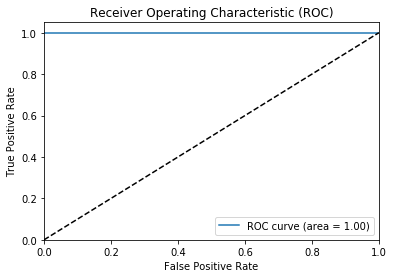

In [26]:
plot_roc(y_pred,y_test)

In [71]:
#x_train=x.values
#y_tain=y.values


In [27]:
from sklearn import svm
#clf = svm.SVC(max_iter=10000)
clf = svm.SVC(kernel ='linear', gamma = 1,random_state=13,max_iter=1000)
clf.fit(x_train, y_train) 

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_svm = clf.predict(x_test)
y_svm

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [29]:
accuracy_svm = metrics.accuracy_score(y_test, y_svm)
accuracy_svm


1.0

In [30]:
score = metrics.precision_score(y_test, y_svm, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 1.0


In [31]:
score = metrics.recall_score(y_test, y_svm, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 1.0


In [32]:
score = metrics.f1_score(y_test,  y_svm, average= "weighted")
print("F1-score: {}".format(score))

F1-score: 1.0


In [33]:
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_svm)
print(confusion_matrix_svm)

[[23243     0]
 [    0 41176]]


In [34]:
print(confusion_matrix)
print(classification)
print(accuracy)

<function confusion_matrix at 0x0000016DF87E68C8>
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     23243
        1.0       1.00      1.00      1.00     41176

avg / total       1.00      1.00      1.00     64419

1.0


[[23243     0]
 [    0 41176]]
Plotting confusion matrix


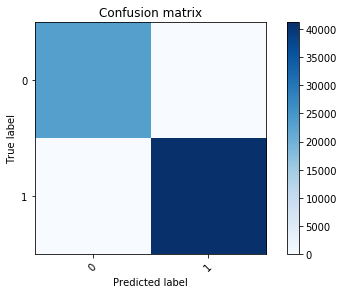

In [35]:
cm = confusion_matrix(y_test, y_svm)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

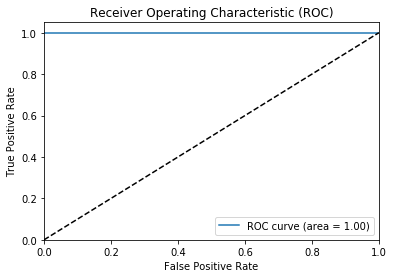

In [36]:
plot_roc(y_svm,y_test)

In [41]:
x = data1.drop(['label'], axis = 1)
y = data1.loc[:, ['label']]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=31)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
y_knn = knn.predict(x_test)

In [46]:
accuracy_knn = metrics.accuracy_score(y_test, y_knn)
print(accuracy_knn)

0.9981856990394877


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
metrics.confusion_matrix(y_test, y_knn)
classification = metrics.classification_report(y_test, y_knn)
print(classification)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37182
          1       1.00      1.00      1.00     65888

avg / total       1.00      1.00      1.00    103070



In [48]:
print(confusion_matrix)
print(classification)
print(accuracy_knn)

<function confusion_matrix at 0x0000016DF87E68C8>
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37182
          1       1.00      1.00      1.00     65888

avg / total       1.00      1.00      1.00    103070

0.9981856990394877


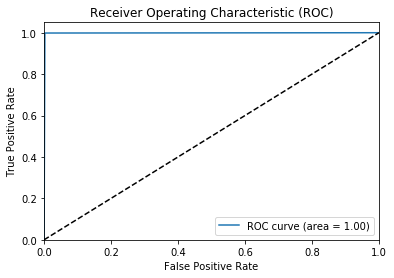

In [49]:
plot_roc(y_knn,y_test)

[[37095    87]
 [  100 65788]]
Plotting confusion matrix


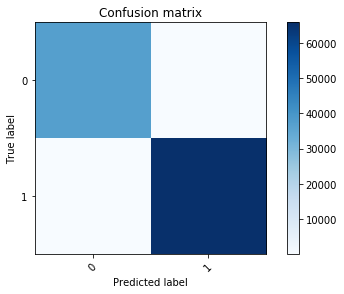

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_knn)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()